# Section 1: Business Understanding
- Question one: Do job-seekers in different countries use different methods to find a job?
- Question two: Are there differences between the way men and women look for jobs?
- Question three: Are there age differences in the methods job-seekers use?
- Question four: Have job-seeking methods methods changed over time?
- Question five: What demographic variables most strongly predict unemployment?

The following explores data from a labour force survey undertaken by Eurostat
- data source: https://ec.europa.eu/eurostat/web/microdata/labour-force-survey
- user guide: https://ec.europa.eu/eurostat/documents/1978984/6037342/EULFS-Database-UserGuide.pdf
- blog post: https://medium.com/@summercook_99949/are-job-seeking-methods-gendered-363baddb1b35


In [274]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
from scipy.stats import ttest_ind
from IPython.display import display
pd.options.display.max_rows = 200


# Section 2: Data Understanding
    

In [275]:
denmark_04 = pd.read_csv('DK_LFS_2004_Y.csv')
denmark_04.shape

(15445, 169)

In [276]:
denmark_04.head()


,COEFF,QUARTER,REFYEAR,REFWEEK,INTWEEK,COUNTRY,REGION,DEGURBA,HHTYPE,HHINST,...,HHPERS,IS881D,IS88PR3D,IS88PR1D,IS883D,HAT11LEV,HATVOC,EDUCVOC,nace2j1d_g,nacepr1d_g
0,0.312709,_A,2004,18,NaN,DK,NaN,3.0,1,9,...,NaN,NaN,NaN,NaN,NaN,9.0,9,9,9.0,9.0
1,0.400003,_A,2004,26,NaN,DK,NaN,0.0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9.0,9.0
2,0.414470,_A,2004,21,NaN,DK,NaN,0.0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9.0,9.0
3,0.662977,_A,2004,14,NaN,DK,NaN,0.0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9.0,9.0
4,0.371445,_A,2004,17,NaN,DK,NaN,0.0,1,9,...,NaN,NaN,NaN,NaN,NaN,NaN,9,9,9.0,NaN


<AxesSubplot:>

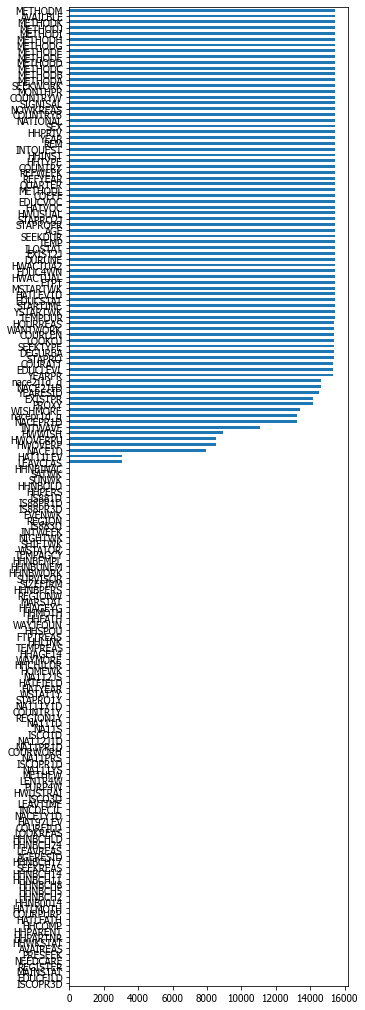

In [277]:
# visualize missing values
plt.rcParams['figure.figsize'] = [5,18]

denmark_04.count().sort_values().plot(kind='barh')

In [278]:
# list of method columns in preferred order
mets = ['METHODE','METHODF','METHODC','METHODD','METHODA','METHODB','METHODG','METHODH','METHODI',\
            'METHODJ','METHODK','METHODL', 'METHODM']
denmark_04[mets].head(10)

,METHODE,METHODF,METHODC,METHODD,METHODA,METHODB,METHODG,METHODH,METHODI,METHODJ,METHODK,METHODL,METHODM
0,9,9,9,9,9,9,9,9,9,9,9,9,9
1,9,9,9,9,9,9,9,9,9,9,9,9,9
2,9,9,9,9,9,9,9,9,9,9,9,9,9
3,9,9,9,9,9,9,9,9,9,9,9,9,9
4,9,9,9,9,9,9,9,9,9,9,9,9,9
5,9,9,9,9,9,9,9,9,9,9,9,9,9
6,9,9,9,9,9,9,9,9,9,9,9,9,9
7,9,9,9,9,9,9,9,9,9,9,9,9,9
8,9,9,9,9,9,9,9,9,9,9,9,9,9
9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [279]:
# explore values 
denmark_04.METHODC.value_counts()

9    14068
1      857
0      520
Name: METHODC, dtype: int64

In [280]:
# function for loading and removing missing data from original files. Original files were not included
# in the repo due to their size but can be found at Eurostat. Data cleaning needed to be combined 
# with gathering due to the number and size of files. The following function was used on all of the 
# original files and then written to new csv files.
def load_data(file):
    '''
    INPUT
        CSV file with survey data
    OUTPUT
        Data frame limited to job seekers
        
    Replaces 9 with nan. An entry of 9 means 'not relevant', 
    meaning the respondents are not utilizing a method and if all 
    columns are entered as 9, the row is removed
    '''
    df = pd.read_csv(file)
    m = df[mets].replace(9,np.nan)
    m= m.dropna(how= 'all')
    df = df.iloc[m.index]
    df= df.dropna(how= 'all', axis=1)
    return df


In [281]:
# load Denmark Spain and Romania for 2004 and 2013 to into dataframes
dk_13 = pd.read_csv('dk_13.csv')
print(dk_13.shape)

dk_04 = pd.read_csv('dk_04.csv')
print(dk_04.shape)

es_13 = pd.read_csv('es_13.csv')
print(es_13.shape)

es_04 = pd.read_csv('es_04.csv')
print(es_04.shape)

ro_13 = pd.read_csv('ro_13.csv')
print(ro_13.shape)

ro_04 = pd.read_csv('ro_04.csv')
print(ro_04.shape)


(8878, 82)
(1377, 79)
(15271, 83)
(12692, 80)
(7750, 83)
(2874, 80)


In [282]:
# load Germany Finland, France, Latvia, Portugal, Austria, to data frames
de_13 =pd.read_csv('de_13.csv')
print(de_13.shape)

fi_13 = pd.read_csv('fi_13.csv')
print(fi_13.shape)

fr_13 = pd.read_csv('fr_13.csv')
print(fr_13.shape)

lv_13 = pd.read_csv('lv_13.csv')
print(lv_13.shape)

pt_13 = pd.read_csv('pt_13.csv')
print(pt_13.shape)

at_13 = pd.read_csv('at_13.csv')
print(at_13.shape)



(21931, 105)
(3090, 101)
(27229, 83)
(2522, 83)
(16314, 83)
(6078, 83)


In [283]:
#load Gulgaria, Belgium, Ireland, Cypress, Italy, Estonia to data frames
bg_13 = pd.read_csv('bg_13.csv')
print(bg_13.shape)

be_13 = pd.read_csv('be_13.csv')
print(be_13.shape)

ie_13 = pd.read_csv('ie_13.csv')
print(ie_13.shape)

cy_13 = pd.read_csv('cy_13.csv')
print(cy_13.shape)

it_13 = pd.read_csv('it_13.csv')
print(it_13.shape)

ee_13 = pd.read_csv('ee_13.csv')
print(it_13.shape)

(1915, 83)
(5645, 83)
(14562, 83)
(3921, 83)
(32418, 83)
(32418, 83)


In [284]:
# load Hungary, Lithuania, Malta, Netherlands, Slovenia, Slovakia, Luxembourg and Greece to dataframes

hu_13 = pd.read_csv('hu_13.csv')
print(hu_13.shape)

lt_13 = pd.read_csv('lt_13.csv')
print(lt_13.shape)

mt_13 = pd.read_csv('mt_13.csv')
print(mt_13.shape)

nl_13 = pd.read_csv('nl_13.csv')
print(nl_13.shape)

si_13 = pd.read_csv('si_13.csv')
print(si_13.shape)

sk_13 = pd.read_csv('sk_13.csv')
print(sk_13.shape)

lu_13 = pd.read_csv('lu_13.csv')
print(lu_13.shape)

el_13 = pd.read_csv('el_13.csv')
print(el_13.shape)



(12181, 106)
(4186, 83)
(1062, 83)
(6443, 106)
(4055, 106)
(7787, 83)
(804, 83)
(22777, 83)


# Part 3: Data Preparation

#### Separate Groups to compare (sex and age for each country)

In [285]:
#Function for dividing data sets by SEX

def sep_sex(df):
    '''INPUT: data frame
       OUTPUT: 2 data frames separate by sex
       '''
    f_df = df[df['SEX']==2]
    m_df = df[df['SEX']==1]
    
    return f_df, m_df

In [286]:
#Function for dividing data sets by AGE (below 40 years and above 40 years)

def sep_age(df):
    """ INPUT: 
            dataframe
        OUTPUT: 
            two data frames separated by 
            age (under 40 and over 40)"""
    
    y_df = df[df['AGE'] > 40]
    o_df = df[df['AGE'] <= 40]
    
    return y_df, o_df

In [287]:
# Divide Danish datasets by sex
f_04,m_04 = sep_sex(dk_13)
f_13, m_13 = sep_sex(dk_04)

In [288]:
#Divide french, german and italian datasets by sex
f_fr,m_fr = sep_sex(fr_13)
f_de,m_de = sep_sex(de_13)
f_it,m_it = sep_sex(it_13)

In [289]:
# Separate Spanish data by sex for 2004 and 2013
f_es, m_es = sep_sex(es_13)
f_ro, m_ro = sep_sex(ro_13)

In [290]:
# Separate full data sets by sex for each country
f_bg, m_bg = sep_sex(bg_13)
f_ie, m_ie = sep_sex(ie_13)
f_be, m_be = sep_sex(be_13)
f_pt, m_pt = sep_sex(pt_13)
f_lv, m_lv = sep_sex(lv_13)
f_fi, m_fi = sep_sex(fi_13)
f_cy, m_cy = sep_sex(cy_13)
f_at, m_at = sep_sex(at_13)
f_lu, m_lu = sep_sex(at_13)


In [291]:
# Separate full data sets by sex for each country

f_ee, m_ee = sep_sex(ee_13)
f_hu, m_hu = sep_sex(hu_13)
f_lt, m_lt = sep_sex(lt_13)
f_si, m_si = sep_sex(si_13)
f_sk, m_sk = sep_sex(sk_13)
f_nl, m_nl = sep_sex(nl_13)
f_mt, m_mt = sep_sex(mt_13)
f_lu, m_lu = sep_sex(lu_13)


In [292]:
# separate Danish, Spanish and Romanian by age
young_dk, old_dk = sep_age(dk_13)

young_es, old_es = sep_age(es_13)

young_ro, old_ro = sep_age(ro_13)

#### Cleaning for modeling demographic regression model

In [293]:
# demographic variables to explore: Nationality, country of employment, sex, age, years living in country
# residing in country,
dem_vars = ['SEEKWORK','NATIONAL', 'COUNTRYB','COUNTRYW', 'SEX', 'AGE', 'YEARESID']

# Function for handling missing values for modelling 
def rmv_nan(df):
    """
    INPUT
        df - data frame to be cleaned
    OUTPUT
        df - clean dataframe
    Drops rows with no data
    Drops columns with more than 10% null values
    """
        
    # drop rows that are all nans
    df.dropna(how='all', axis=0,inplace=True)
    
    # drop columns with more than 10% null values
    df = df[df.columns[df.isnull().mean()<.10]]
    
    
    df.SEEKWORK.replace(9,0, inplace=True)
    df.SEEKWORK.replace(dict.fromkeys([3,4,1,2], 1), inplace=True)


    df = df[dem_vars].dropna(how='any', axis=0)
    
    return df

In [294]:
# load and clean data set for Denmark 2013
denmark_13 = pd.read_csv('full_dk_13.csv')
jbseek_df = rmv_nan(denmark_13)
print(jbseek_df.shape)

(134108, 7)


In [295]:
# make dummy variables for categorical variables. All demographic variables are categorical
for col in dem_vars:
    if jbseek_df[col].dtype == float:
        jbseek_df[col] = jbseek_df[col].astype(int)

    jbseek_df =  pd.concat([jbseek_df.drop(col, axis=1), pd.get_dummies(jbseek_df[col], prefix=col, prefix_sep='_')],\
                        axis=1)

#### Plots for comparing groups

In [296]:
# Descriptions of method columns
methods = ['Answered job ads', 'Studied job ads', 'Direct contact w/employers', \
           'Friends, relatives, unions','Public empl. office', 'Private empl. office',\
          'Test, interview or exam','Land or equipment', 'Looked for permits/licences' ,'Awaiting results',\
          'Waiting for a call', 'Competition', 'Other']

In [297]:
# plot horizontal bar chart of aggregated method columns emphacizing 3 important methods

def plot_method2h(df_1, df_2, title, legend):
    
    """
    INPUT: list of data frames to be compared
    OUTPUT: histogram comparing the distribution of methods for each data frame
    """
    
    plt.clf
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.rcParams['figure.figsize'] = [5,3]

    df_1 = df_1[mets]
    df_2 = df_2[mets]
    
    x_1= df_1.mean()
    x_2= df_2.mean()
    
    # plot results
    fig, ax = plt.subplots()

    x_axis = np.arange(df_2.shape[1])
    
    alphas1 = [0.7,0.7,0.7,0.2,0.2,0.2,0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]
    alphas2 = [0.7,0.7,0.7,0.2,0.2,0.2,0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

    rgba_colors = np.zeros((13,4))
    rgba_colors[:,0] = 1
    rgba_colors[:,1] = 0.1
    rgba_colors[:,2] = 0.1
    rgba_colors[:, 3] = alphas2
    
    rgba_colors1 = np.zeros((13,4))
    rgba_colors1[:,0] = 0.1
    rgba_colors1[:,1] = 0.2
    rgba_colors1[:,2] = 0.9
    rgba_colors1[:, 3] = alphas1

    ax.barh(x_axis-0.2, x_2, height= 0.4, color=rgba_colors)

    ax.barh(x_axis+0.2, x_1, height=0.4, color=rgba_colors1)
    
    for lh in ax.legend(legend, prop={'size': 12}).legendHandles: 
        lh.set_alpha(0.7)
        
    ax.set_yticks(x_axis, labels=methods, fontsize=11)
    ax.set_title(title, fontsize=16, y=1.04)
    plt.xlabel("Mean of each method", fontsize=11)
    ax.get_yticklabels()[0].set_weight('bold')
    ax.get_yticklabels()[1].set_weight('bold')
    ax.get_yticklabels()[2].set_weight('bold')
    plt.gca().invert_yaxis()
    ax.grid(visible=True,axis='x', alpha=0.5)

    plt.rcParams["font.family"] = 'Tahoma'


In [298]:
# plot horizontal bar with all methods displayed equally

def plot_method2hgen(df_1, df_2, title, legend):
    
    """
    INPUT: list of data frames to be compared
    OUTPUT: histogram comparing the distribution of methods for each data frame
    """
    
    plt.clf
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.rcParams['figure.figsize'] = [5,3]

    df_1 = df_1[mets]
    df_2 = df_2[mets]
    
    # sum each column (method) and divide by the sum of all methods in the df
    x_1= df_1.mean()
    x_2= df_2.mean()
    
    # plot results
    fig, ax = plt.subplots()

    x_axis = np.arange(df_2.shape[1])
    
    alphas1 = [0.7,0.7,0.7,0.7,0.7,0.7,0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
    alphas2 =  [0.7,0.7,0.7,0.7,0.7,0.7,0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]

    rgba_colors = np.zeros((13,4))
    rgba_colors[:,0] = 1
    rgba_colors[:,1] = 0.1
    rgba_colors[:,2] = 0.1
    rgba_colors[:, 3] = alphas2
    
    rgba_colors1 = np.zeros((13,4))
    rgba_colors1[:,0] = 0.1
    rgba_colors1[:,1] = 0.2
    rgba_colors1[:,2] = 0.9
    rgba_colors1[:, 3] = alphas1


    ax.barh(x_axis+0.2, x_1, height=0.4, color=rgba_colors1)
    ax.barh(x_axis-0.2, x_2, height= 0.4, color=rgba_colors)

    
    for lh in ax.legend(legend, prop={'size': 12}).legendHandles: 
        lh.set_alpha(0.7)
        
    ax.set_yticks(x_axis, labels=methods, fontsize=11)
    ax.set_title(title, fontsize=16, y=1.04)
    plt.xlabel("Mean of each method", fontsize=11)

    plt.gca().invert_yaxis()
    ax.grid(visible=True,axis='x', alpha=0.5)


In [299]:
# plot three different data sets

import matplotlib as mpl

# function for plotting 3 datasets 
def plot_method3(df_1, df_2, df_3, title):
    plt.clf()
    plt.rcParams['figure.figsize'] = [5, 3]

    # replace 9 with 0 to prevent the count of irrelevant entries and select method columns
    df_1 = df_1[mets]
    df_2 = df_2[mets]
    df_3 = df_3[mets]

    # sum each column (method) and divide by the sum of all methods in the df
    x_1= df_1[mets].mean()
    x_2= df_2[mets].mean()
    x_3= df_3[mets].mean()

    x_axis = np.arange(df_2.shape[1])
    plt.bar(x_axis - 0.2, x_1, width=0.2, align='center')
    plt.bar(x_axis, x_2, width=0.2, align='center')
    plt.bar(x_axis +0.2, x_3, width=0.2, align='center')
    plt.title(title)
    plt.legend()

    
    plt.xticks(ticks=np.arange(0,13,1), labels=methods, rotation=90)
    plt.legend(['Denmark', 'Romania', 'Spain'])


In [300]:
# Sum the total number of countries that have the highest proportion of job-seeking 
# activity for each sex

def compare_sex(method): 
    '''
    INPUT
        Method column name
    OUTPUT
        Tuple including number of countries where the method is a higher proportion of all search methods
        for men, for women and the equal
    '''
    men_ls = 0
    wom_ls = 0
    same = 0
    for df in [dk_13, es_13, ro_13,de_13,fi_13, fr_13,lv_13,pt_13,at_13,bg_13,be_13,ie_13,cy_13,it_13, ee_13,hu_13 ,lt_13 ,\
    mt_13 ,nl_13 ,si_13 ,sk_13,lu_13, el_13 ]:

        f, m = sep_sex(df)
        m=m[mets]
        f=f[mets]
        m= m[m.sum(axis=1)>0].sum()/m[m.sum(axis=1)>0].sum().sum()
        f= f[f.sum(axis=1)>0].sum()/f[f.sum(axis=1)>0].sum().sum()
        if m[method]> f[method]:
            men_ls+=1
        elif f[method]> m[method]:
            wom_ls+=1
        else:
            same+=1
    return men_ls, wom_ls, same


In [301]:
# function for finding the average percentage of seeking activity for a given method for men and women

def sex_avg(method): 
    '''
    INPUT
        Method column name
    OUTPUT
        Tuple including number of countries where the method is a higher proportion of all search methods
        for men, for women and the equal
    '''
    men_ls = 0
    wom_ls = 0
    same = 0
    count = 0
    all_dfs = [dk_13, es_13, ro_13,de_13,fi_13, fr_13,lv_13,pt_13,at_13,bg_13,be_13,ie_13,cy_13,it_13, ee_13,hu_13 ,lt_13 ,\
    mt_13 ,nl_13 ,si_13 ,sk_13,lu_13, el_13 ]
    for df in all_dfs:
        count+=len(df)
        #separate sexes
        f, m = sep_sex(df)
        m=m[mets]
        f=f[mets]
        m= m[m.sum(axis=1)>0].sum()/m[m.sum(axis=1)>0].sum().sum()
        f= f[f.sum(axis=1)>0].sum()/f[f.sum(axis=1)>0].sum().sum()
        
        men_ls+=m[method]
        wom_ls+=f[method]
    return men_ls/len(all_dfs)*100, wom_ls/len(all_dfs)*100
        

In [302]:
# use compare_sex function on the three methods of focus
tot_df = pd.DataFrame()
tot_df['Responding to job ads'] =  compare_sex('METHODE')
tot_df['Studying job ads'] =  compare_sex('METHODF')
tot_df['Direct contact w/employer'] = compare_sex('METHODC')

#### Regression modeling with demographic variables

In [303]:
# drop y value and age groups outside of normal working age
X = jbseek_df.drop(['SEEKWORK_0','SEEKWORK_1', 'AGE_75', 'AGE_7','AGE_65'], axis=1)
y= jbseek_df['SEEKWORK_1']


In [304]:
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.33, random_state=42)

lm_model = LogisticRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        


LogisticRegression()

In [305]:
y_test_preds = lm_model.predict(X_test)

# Part 4: Analyse the results

###  Question one: Do job-seekers in different countries use different methods to find a job?
- Answer: It is clear from the exploring data with bar charts that there is a difference. But we can also find the p-values to see if the difference could be due to chance. If we compare Denmark and Spain, all of the p-values are very low so we can be sure that there is a real difference. 

In [306]:
import scipy.stats as stats
import math
from scipy.stats import norm


def find_p_vs(df_1, df_2):
    '''INPUT: 2 dataframes to be compared
       OUTPUT: dataframe including the differences between groups for each method and the p-value
    '''
    method_df = pd.DataFrame()
    p_v = []

    for met in mets:
        p_v.append(stats.ttest_ind(a=df_1[met],b=df_2[met],equal_var=False)[1])
    method_df['Difference'] = (df_1[mets].mean() - df_2[mets].mean())

    method_df['P_value']= p_v
    method_df.index = methods
    return method_df

     

In [307]:
print('Differences and in methods and p-values between Denmark and Spain for 2013:\n\n',  find_p_vs(dk_13, es_13))


Differences and in methods and p-values between Denmark and Spain for 2013:

                              Difference        P_value
Answered job ads               0.200084  4.778400e-202
Studied job ads                0.080373   1.711396e-44
Direct contact w/employers    -0.145144  4.586133e-128
Friends, relatives, unions    -0.260180   0.000000e+00
Public empl. office           -0.000783   8.923797e-01
Private empl. office          -0.281612   0.000000e+00
Test, interview or exam       -0.008354   5.581882e-02
Land or equipment             -0.012955   5.599383e-28
Looked for permits/licences   -0.011004   1.487303e-18
Awaiting results               0.081494   7.218592e-39
Waiting for a call            -0.265473   0.000000e+00
Competition                   -0.005438   1.225596e-10
Other                          0.109597  4.448529e-226


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


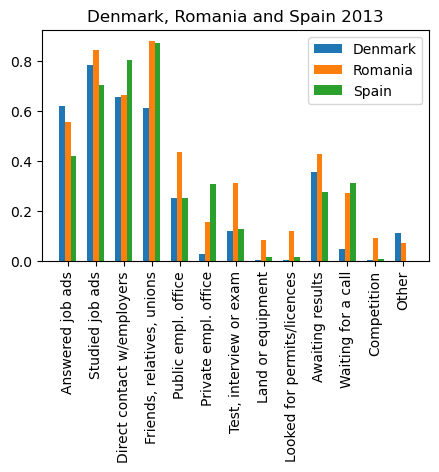

In [320]:
# Plot Romania Denmark and Spain

plot_method3( dk_13, ro_13,es_13, 'Denmark, Romania and Spain 2013') 

### Question two: Are there differences between the way men and women look for jobs?

- Answer: The categories that reached the 0.05 p-value threshhold were: 
-- Direct contact w/employers
-- Friends, relatives, unions
-- Public empl. office            
-- Private empl. office

In [309]:
print('Differences and in methods and p-values between men and women for 2013:\n\n',  find_p_vs(f_13, m_13))


Differences and in methods and p-values between men and women for 2013:

                              Difference   P_value
Answered job ads               0.051455  0.051216
Studied job ads                0.003053  0.872107
Direct contact w/employers    -0.088952  0.000676
Friends, relatives, unions    -0.064263  0.017926
Public empl. office            0.055874  0.039502
Private empl. office          -0.016602  0.027989
Test, interview or exam        0.004503  0.501346
Land or equipment             -0.005828  0.160950
Looked for permits/licences   -0.000795  0.789891
Awaiting results              -0.001420  0.943581
Waiting for a call            -0.000133  0.984777
Competition                    0.001766  0.612551
Other                          0.007064  0.308032


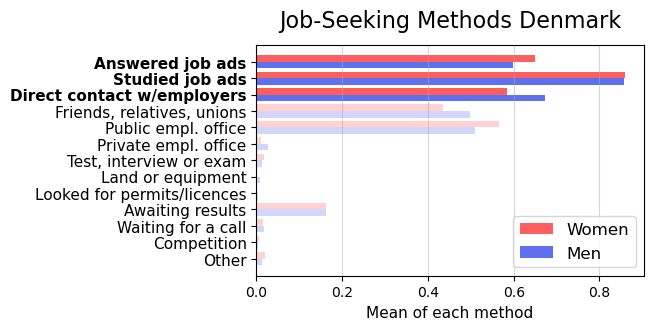

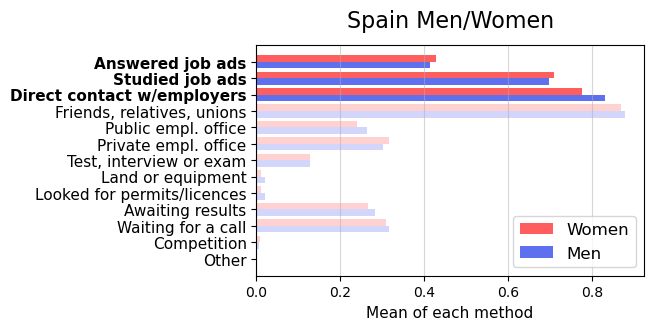

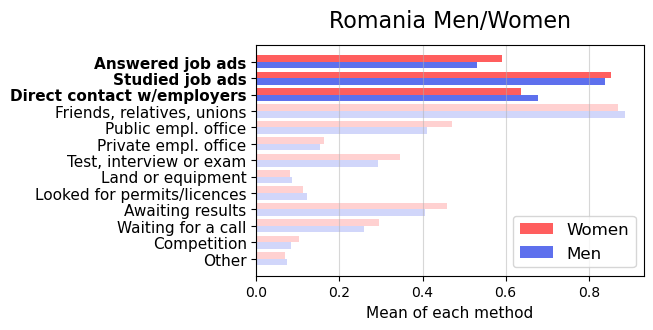

In [310]:
# plot differences in sex for Denmark, Spain and Romania
plot_method2h(m_13, f_13, 'Job-Seeking Methods Denmark', ['Women', 'Men'])  
plt.show()
plot_method2h(m_es, f_es, 'Spain Men/Women', ['Women', 'Men'])
plt.show()
plot_method2h(m_ro, f_ro, 'Romania Men/Women',['Women', 'Men'])

In [311]:
# show the average percentage of each method for men and women
for i, j in zip(mets, methods):
    print(j, sex_avg(i))

Answered job ads (10.210187041384064, 10.915309516867602)
Studied job ads (18.446883228194096, 19.3766745083026)
Direct contact w/employers (16.021693444258567, 15.003040842381266)
Friends, relatives, unions (18.735204883513628, 18.40462728099861)
Public empl. office (12.719441617716845, 13.088784290609764)
Private empl. office (5.359281017081011, 4.819056659887572)
Test, interview or exam (4.70674464752082, 4.697440552220971)
Land or equipment (0.42774058428133716, 0.3256172269450635)
Looked for permits/licences (0.467326098048204, 0.3550064706147769)
Awaiting results (5.240316904976815, 5.297624428785933)
Waiting for a call (4.899345308234717, 4.911370010143421)
Competition (0.5212436668872156, 0.6025089468408175)
Other (2.24459155790267, 2.2029392654016022)


(0.0, 22.0)

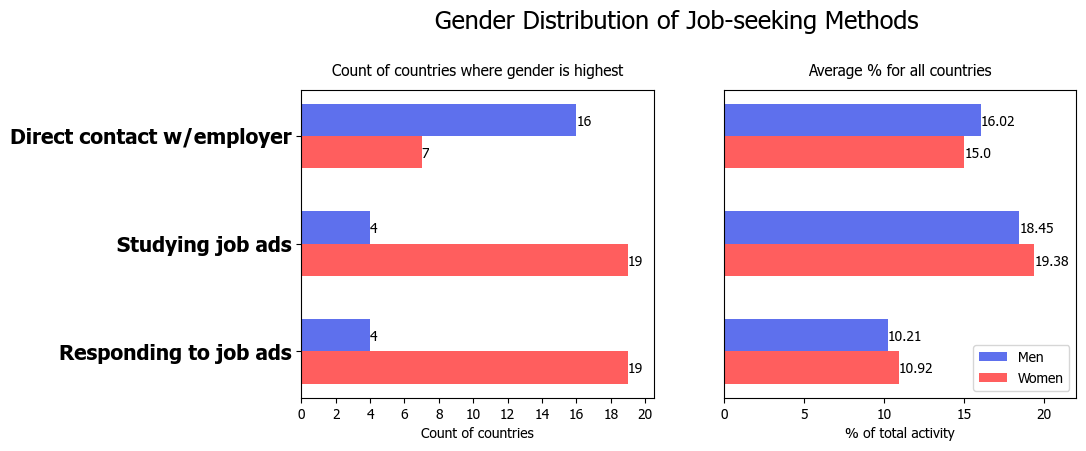

In [312]:
# Plot gender distribution averages for all countries for each method

x1 = sex_avg(mets)[0][0:3]
x2 =sex_avg(mets)[1][0:3]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

fig.suptitle('Gender Distribution of Job-seeking Methods', y=1.08, fontsize=18)
col1= (.1, .2,.9)
col2= (1, .1,.1)

y_axis0 = np.arange(tot_df.shape[1])
x_axis0 = np.arange(0, tot_df.iloc[1].max()+2, 2)
axes[0].set_xticks(x_axis0, fontsize=11)
axes[0].barh(y_axis0+0.15, tot_df.iloc[0], height=0.3, color=col1, alpha=.7)
axes[0].barh(y_axis0-0.15, tot_df.iloc[1], height=0.3, color=col2, alpha=.7)
axes[0].set_title('Count of countries where gender is highest', fontsize=11, y=1.02)
#axes[0].legend(['Men', 'Women'], prop={'size': 7}, loc='lower right', framealpha=0.5)
axes[0].set_yticks(y_axis0, labels=tot_df.columns, fontsize=15, fontweight='bold')
axes[0].set_xlabel('Count of countries')
for index, value in enumerate(tot_df.iloc[0]):
    axes[0].text(value, index+.1, str(value))

for index, value in enumerate(tot_df.iloc[1]):
    axes[0].text(value, index-.2, str(value))
axes[0].set_xlim(0,20.5)    



x_axis1 = np.arange(len(x1))
axes[1].set_yticks(y_axis0, labels=tot_df.columns, fontsize=14)

axes[1].get_yaxis().set_visible(False)
axes[1].barh(x_axis1+0.15 , x1, height=0.3, color=col1, alpha=0.7)
axes[1].barh(x_axis1-0.15 , x2, height=0.3, color=col2, alpha=0.7)
axes[1].legend(['Men', 'Women'], prop={'size': 10}, loc='lower right')
axes[1].set_title('Average % for all countries', fontsize=11,y=1.02)
axes[1].set_xlabel('% of total activity')
for index, value in enumerate(x1):
    axes[1].text(value, index+.1,
             str(round(value,2)))

for index, value in enumerate(x2):
    axes[1].text(value, index-.2,
             str(round(value,2)))
    
axes[1].set_xlim(0,22)    
    


### Question three: Are there age differences in the methods job-seekers use?
- Answer: Ther are differences in age in all categories

In [313]:
print('Differences and in methods and p-values between Young and Old in Denmarkfor 2013:\n\n',  find_p_vs(young_dk, old_dk))


Differences and in methods and p-values between Young and Old in Denmarkfor 2013:

                              Difference       P_value
Answered job ads               0.102260  2.402790e-22
Studied job ads                0.099114  1.640849e-30
Direct contact w/employers    -0.018517  7.823237e-02
Friends, relatives, unions     0.001751  8.706653e-01
Public empl. office            0.169321  1.429323e-63
Private empl. office           0.024557  5.273614e-10
Test, interview or exam        0.029731  5.327477e-05
Land or equipment              0.002863  3.866588e-02
Looked for permits/licences    0.003143  5.903526e-02
Awaiting results               0.032066  2.561181e-03
Waiting for a call             0.030881  8.118554e-10
Competition                    0.000726  4.859399e-01
Other                          0.005842  4.002649e-01


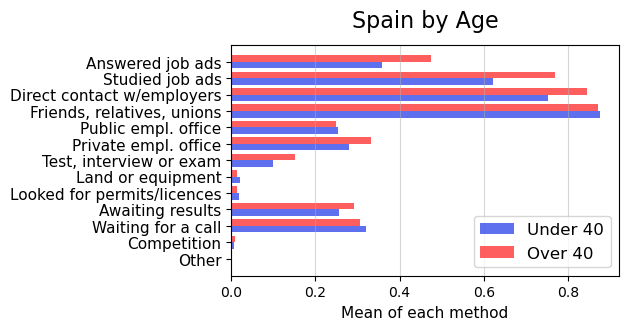

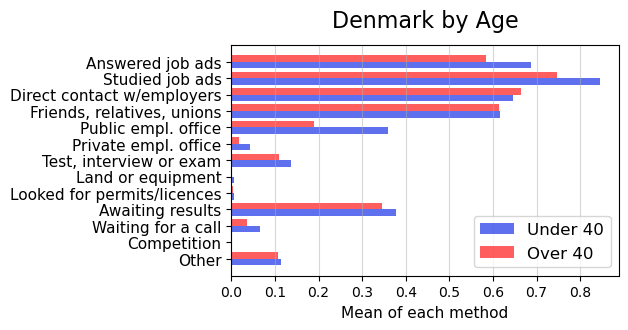

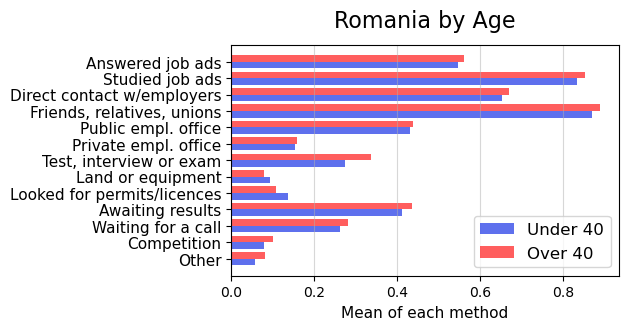

In [314]:
plot_method2hgen(young_es, old_es, 'Spain by Age', ['Under 40', 'Over 40'])  
plt.show()
plot_method2hgen(young_dk, old_dk, 'Denmark by Age', ['Under 40', 'Over 40'])  
plt.show()
plot_method2hgen(young_ro, old_ro, 'Romania by Age', ['Under 40', 'Over 40'])  


### Question four: Have job-seeking methods methods changed over time?
- Answer: There are differences in all categories


In [315]:
print('Differences and in methods and p-values between 2003 and 2013 in Denmark:\n\n',  find_p_vs(dk_04, dk_13))


Differences and in methods and p-values between 2003 and 2013 in Denmark:

                              Difference       P_value
Answered job ads               0.006641  6.355222e-01
Studied job ads                0.076167  2.665615e-13
Direct contact w/employers    -0.035776  1.071612e-02
Friends, relatives, unions    -0.151891  2.754052e-25
Public empl. office            0.291476  6.341899e-84
Private empl. office          -0.008928  2.272202e-02
Test, interview or exam       -0.102969  7.057719e-97
Land or equipment              0.001930  3.365663e-01
Looked for permits/licences   -0.001939  2.336604e-01
Awaiting results              -0.193990  1.673701e-63
Waiting for a call            -0.029591  8.002062e-13
Competition                    0.002330  2.053039e-01
Other                         -0.092168  1.104271e-77


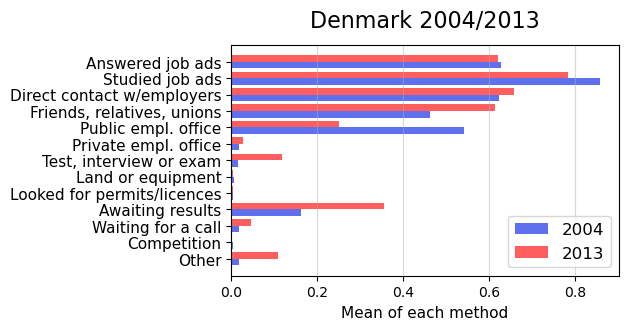

In [316]:
# plot Denmark and Romania for 2004 and 2013

plot_method2hgen(dk_04, dk_13, 'Denmark 2004/2013', ['2004', '2013'])

### Question five: What demographic variables most strongly predict unemployment?
- Answer: 

**The most highly correlated features:** 

- **Working Country**. There are only 2 categories either one is working in their own country or they selected 'no answer'. I assume that the people who select 'no answer' are more likely to be looking for a job in a country that is not their country of origin. Selecting 'Own country' is negatively correlated with unemployment
- **Age** is the second most important feature where being around 20 young is correlated positively with unemployment.  
- **Number of years subsiding in country**. Subsiding 11 or more years is negatively with unemployment and living 5 years is positively correlated with unemployment

In [317]:
r2_score(y_test, y_test_preds)
lm_model.coef_

array([[ 0.03271285, -0.03271285,  0.01559434, -0.01559434, -3.6030085 ,
         3.6030085 , -0.03436203,  0.03436203,  2.60379361,  1.75430844,
         1.979348  ,  0.01559434, -0.07204536,  0.07409789]])

In [318]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the logistic model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a logistical model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X.columns
    coefs_df['coefs'] = lm_model.coef_[0]
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_[0])
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

# look at the results
coef_df

,est_int,coefs,abs_coefs
4,COUNTRYW_000-OWN COUNTRY,-3.603009,3.603009
5,COUNTRYW_NO ANSWER,3.603009,3.603009
8,AGE_20,2.603794,2.603794
10,AGE_47,1.979348,1.979348
9,AGE_32,1.754308,1.754308
13,YEARESID_11,0.074098,0.074098
12,YEARESID_5,-0.072045,0.072045
7,SEX_2,0.034362,0.034362
6,SEX_1,-0.034362,0.034362
0,NATIONAL_000-OWN COUNTRY,0.032713,0.032713


In [319]:
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using was 0.45261204411017486 on 44256 values.'